# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [38]:
# Output File (CSV)
output_data_file = "output/cities.csv"
#city_data = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#city_data

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



624

In [40]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [74]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_city = ["ostrovnoy","zhuhai","Hars", "New York","new norfolk"]
#cities = []
#response = requests.get(query_url + "Paris").json()


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
city_name = []
country =[]
date =[]

city_id = 1
set = 1
record = 0
print("Beginning Data Retrieval")
print("=========================")
# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in sample_city: 
   
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        #print(f"Processing {city_id} - {city} found")
        #city_id += 1
        if record > 49:
            record = 1
            set += 1
        else:
            record += 1
        print(f"Processing Record {record} of Set {set} | {city}")
        print("----------")
        #print(json.dumps(response, indent=4, sort_keys=False))
    
    except:
        print(f"{city} not found, skipping")
        print("------------")
        pass
        

Beginning Data Retrieval
Processing Record 1 of Set 1 | hofn
----------
Processing Record 2 of Set 1 | ilulissat
----------
Processing Record 3 of Set 1 | punta arenas
----------
Processing Record 4 of Set 1 | mar del plata
----------
Processing Record 5 of Set 1 | yellowknife
----------
Processing Record 6 of Set 1 | geraldton
----------
Processing Record 7 of Set 1 | sept-iles
----------
Processing Record 8 of Set 1 | puerto ayora
----------
Processing Record 9 of Set 1 | kapaa
----------
Processing Record 10 of Set 1 | salalah
----------
karauzyak not found, skipping
------------
Processing Record 11 of Set 1 | mataura
----------
Processing Record 12 of Set 1 | ketchikan
----------
Processing Record 13 of Set 1 | kamenka
----------
Processing Record 14 of Set 1 | georgetown
----------
Processing Record 15 of Set 1 | peniche
----------
Processing Record 16 of Set 1 | oyama
----------
Processing Record 17 of Set 1 | rikitea
----------


KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
#api dataframe
city_data = pd.DataFrame({
    "City":city_name,
    "Country":country,
    "Max Temp": max_temp,
    "Date":date,
   "Cloudiness":cloud,
   "Lat":lat,
    "Lng":lon,
    "Wind Speed": wind_speed,
    "Humidity":humidity})

city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Hofn,IS,39.18,1619751639,15,64.2539,-15.2082,6.67,62
1,Ilulissat,GL,33.80,1619751508,100,69.2167,-51.1000,4.52,75
2,Punta Arenas,CL,42.80,1619751276,90,-53.1500,-70.9167,9.22,93
3,Mar del Plata,AR,63.00,1619750963,0,-38.0023,-57.5575,11.50,82
4,Yellowknife,CA,32.00,1619751231,75,62.4560,-114.3525,11.50,47
...,...,...,...,...,...,...,...,...,...
562,Cayenne,GF,78.01,1619751963,40,4.9333,-52.3333,2.30,100
563,San Quintín,MX,62.82,1619751404,0,30.4833,-115.9500,5.93,78
564,Policoro,IT,55.99,1619751964,93,40.2115,16.6726,4.79,99
565,Masvingo,ZW,60.93,1619751964,1,-20.0637,30.8277,4.29,71


In [43]:
city_data.to_csv("WeatherPy/WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
clean_city_data = city_data.loc[city_data["Humidity"] <= 100]
clean_city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Hofn,IS,39.18,1619751639,15,64.2539,-15.2082,6.67,62
1,Ilulissat,GL,33.80,1619751508,100,69.2167,-51.1000,4.52,75
2,Punta Arenas,CL,42.80,1619751276,90,-53.1500,-70.9167,9.22,93
3,Mar del Plata,AR,63.00,1619750963,0,-38.0023,-57.5575,11.50,82
4,Yellowknife,CA,32.00,1619751231,75,62.4560,-114.3525,11.50,47
...,...,...,...,...,...,...,...,...,...
562,Cayenne,GF,78.01,1619751963,40,4.9333,-52.3333,2.30,100
563,San Quintín,MX,62.82,1619751404,0,30.4833,-115.9500,5.93,78
564,Policoro,IT,55.99,1619751964,93,40.2115,16.6726,4.79,99
565,Masvingo,ZW,60.93,1619751964,1,-20.0637,30.8277,4.29,71


In [45]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data.describe()

,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000
mean,60.543810,1.619752e+09,54.222222,22.361748,19.712731,7.263898,70.176367
std,18.495809,2.729017e+02,38.336339,33.218559,88.119095,4.587059,22.256153
min,10.000000,1.619751e+09,0.000000,-54.800000,-179.166700,0.380000,8.000000
25%,45.070000,1.619751e+09,18.500000,-6.316700,-57.422800,3.940000,59.000000
50%,62.600000,1.619752e+09,60.000000,29.583300,26.400000,6.080000,75.000000
75%,77.000000,1.619752e+09,92.000000,50.229750,90.019550,9.505000,87.500000
max,96.800000,1.619752e+09,100.000000,78.218600,179.316700,28.390000,100.000000


In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

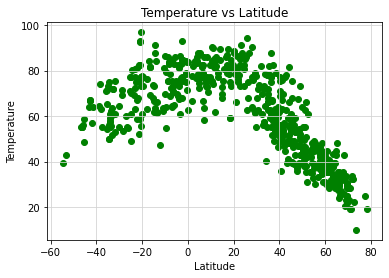

In [60]:
#Temp vs Lat   #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", color="green")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/temp_lat.png')
plt.show()


## Latitude vs. Humidity Plot

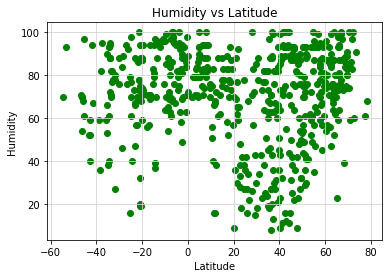

In [61]:
#Humidity vs Lat #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", color="green")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/hum_lat.png')
plt.show()

## Latitude vs. Cloudiness Plot

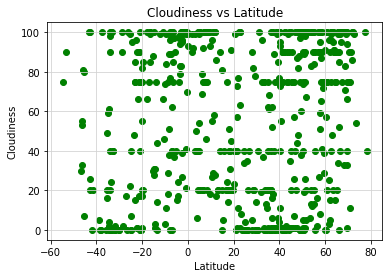

In [62]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", color="green")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/cloud_lat.png')
plt.show()

## Latitude vs. Wind Speed Plot

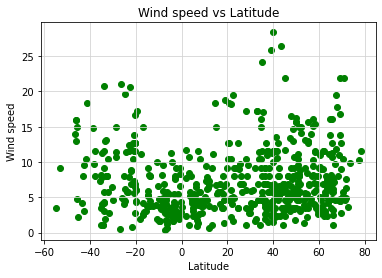

In [63]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", color="green")
plt.title("Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('WeatherPy/wind_lat.png')
plt.show()

## Linear Regression

In [51]:
north = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north
south = clean_city_data.loc[(clean_city_data["Lat"] <= 0)]
south

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
2,Punta Arenas,CL,42.80,1619751276,90,-53.1500,-70.9167,9.22,93
3,Mar del Plata,AR,63.00,1619750963,0,-38.0023,-57.5575,11.50,82
5,Geraldton,AU,71.60,1619751412,90,-28.7667,114.6000,14.97,46
7,Puerto Ayora,EC,75.09,1619751267,21,-0.7393,-90.3518,8.32,86
10,Mataura,NZ,55.00,1619751252,33,-46.1927,168.8643,15.99,70
...,...,...,...,...,...,...,...,...,...
543,Port-Gentil,GA,78.40,1619751513,100,-0.7193,8.7815,9.10,84
545,Sokoni,TZ,73.40,1619751958,75,-6.4333,39.5500,5.75,100
550,Acarí,PE,68.04,1619751960,30,-15.4311,-74.6158,3.13,83
553,Same,TZ,67.32,1619751961,98,-4.0667,37.7333,2.26,95


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7780672024923326


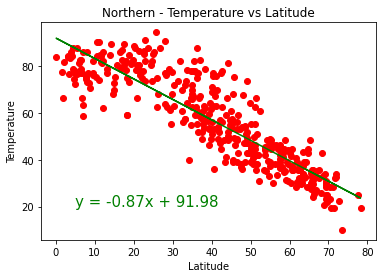

In [64]:
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(5,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_temp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009604369297445691


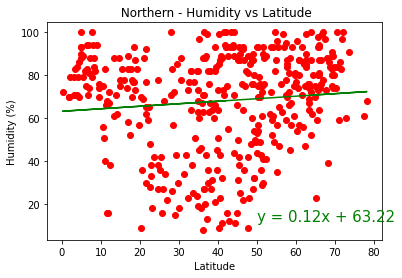

In [65]:

x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,12),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_hum_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02641078396181261


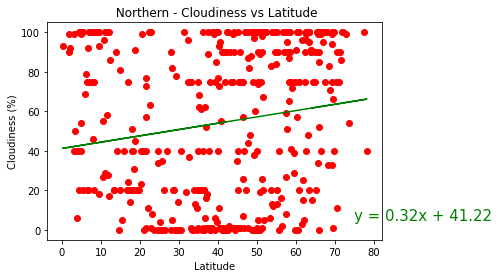

In [66]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(75,5),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020100344686395114


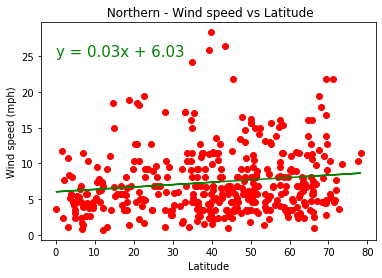

In [67]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(0,25),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.33762085253097496


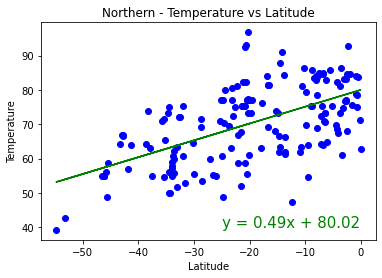

In [68]:
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-25,40),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_temp_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.051587676287351086


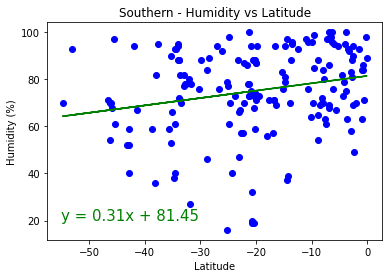

In [69]:
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_hum_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0793352838269938


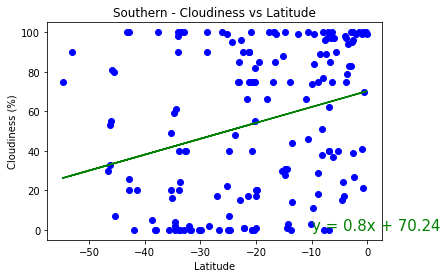

In [70]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-10,0),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13262692114213384


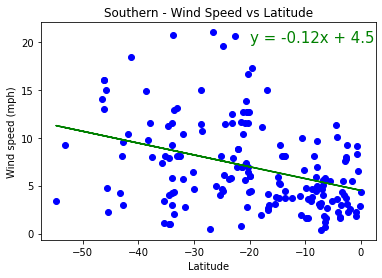

In [73]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(-20,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('WeatherPy/south_wind_lat.png')
plt.show()